#                                                                                   

# 1

<span style="font-size: 1.2em; font-weight: bold; position: relative; top: 0.0em;">Patient Summary (For Reference During Call)</span>

- **Age**: Lydia Gasaatura is a 67-year-old woman; she is my mother (DOB: 09/16/1955).

- **Current Medication**: She is currently using Mixtard 30&reg;, a European brand of insulin. This insulin is a 30/70 mix of soluble insulin and isophane insulin, containing 30% soluble (fast-acting) insulin and 70% isophane (intermediate-acting) insulin.

- **Dosage**: Lydia administers 25 units of Mixtard 30&reg; in the morning before breakfast and 25 units in the evening before dinner. This equates to 0.25 ml per injection, given that the insulin concentration is 100 IU/ml in a 10 ml vial.

- **Expected Refill**: She will need 15 ml of insulin for a month (0.5 ml/day x 30 days). Since the medication is available only in 10 ml vials, she will need to order two vials. A doctor will call in the prescription for the equivalent of two 10 ml vials of Mixtard 30&reg; to the pharmacy.

- **Local Availability**: Are the equivalent of 10 ml vials of Mixtard 30&reg; available at your pharmacy? Is there also an option for the KwikPen&reg;, as that is her preferred method of sub-cutaneous administration?

<span style="font-size: 1.2em; font-weight: bold; position: relative; top: 0.0em;">What to Expect (If Pharmacist is Familiar with Mixtard&reg;)</span>

- **Price**: Humulin&reg; 70/30 10 ml vials cost \$173.00 per vial. She will need to order two vials per month, making the total cost \$346.00. As an alternative, Novolin&reg; 70/30 10 ml vials cost \$177.00 each, bringing the total cost to \$354.00 per month.

- **Mixtard 30&reg;**: This medication contains a 30/70 mix of soluble (fast-acting) and isophane (intermediate-acting) insulin.

- **U.S. Equivalent (Novolin&reg; 70/30 or Humulin&reg; 70/30)**: In the United States, the naming convention for similar insulin formulations is reversed. Here, 70/30 denotes 70% isophane (intermediate-acting) insulin and 30% soluble (fast-acting) insulin, which is essentially the same formulation as Mixtard 30&reg;.

# 2

/Users/d/Dropbox (Personal)/1f.ἡἔρις,κ/1.ontology/myenv/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


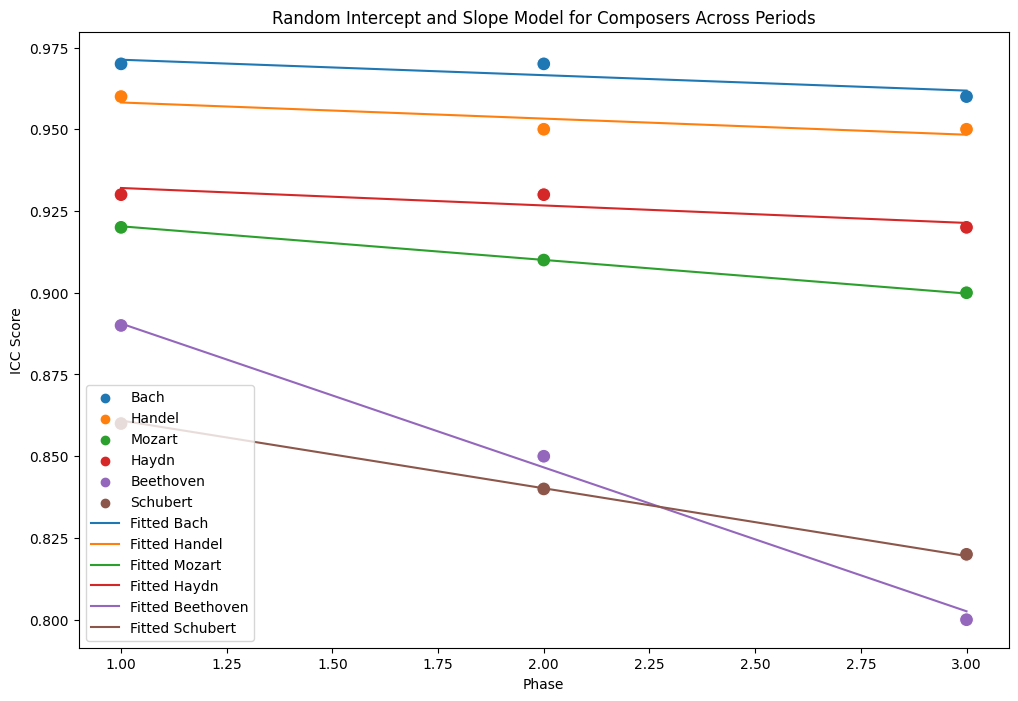

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hypothetical DataFrame: each row represents a composer at a particular phase in their career
# Added a numeric representation of 'phase' for plotting
df = pd.DataFrame({
    'composer': ['Bach', 'Bach', 'Bach', 'Handel', 'Handel', 'Handel',
                 'Mozart', 'Mozart', 'Mozart', 'Haydn', 'Haydn', 'Haydn',
                 'Beethoven', 'Beethoven', 'Beethoven', 'Schubert', 'Schubert', 'Schubert'],
    'phase': ['Early', 'Middle', 'Late'] * 6,
    'phase_num': [1, 2, 3] * 6,
    'ICC_score': [0.97, 0.97, 0.96, 0.96, 0.95, 0.95,
                  0.92, 0.91, 0.90, 0.93, 0.93, 0.92,
                  0.89, 0.85, 0.80, 0.86, 0.84, 0.82]
})

# Fit the model
md = smf.mixedlm("ICC_score ~ phase_num", df, groups=df['composer'], re_formula="~phase_num")
mdf = md.fit()

# Create an empty plot
plt.figure(figsize=(12, 8))

# Plot raw data points
sns.scatterplot(data=df, x='phase_num', y='ICC_score', hue='composer', s=100, palette='tab10')

# Plot fitted lines
for composer in df['composer'].unique():
    subset = df[df['composer'] == composer]
    x = subset['phase_num']
    y_fitted = mdf.fittedvalues[subset.index]
    plt.plot(x, y_fitted, label=f'Fitted {composer}')

plt.xlabel('Phase')
plt.ylabel('ICC Score')
plt.title('Random Intercept and Slope Model for Composers Across Periods')
plt.legend()
plt.show()


In [10]:
df.head()

,composer,phase,phase_num,ICC_score
0,Bach,Early,1,0.97
1,Bach,Middle,2,0.97
2,Bach,Late,3,0.96
3,Handel,Early,1,0.96
4,Handel,Middle,2,0.95


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   composer   18 non-null     object 
 1   phase      18 non-null     object 
 2   phase_num  18 non-null     int64  
 3   ICC_score  18 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 708.0+ bytes


In [15]:
df.describe()

,phase_num,ICC_score
count,18.000000,18.000000
mean,2.000000,0.907222
std,0.840168,0.053115
min,1.000000,0.800000
25%,1.000000,0.867500
50%,2.000000,0.920000
75%,3.000000,0.950000
max,3.000000,0.970000


In [8]:
summary = mdf.summary()
summary.tables[0]

,0,1,2,3
0,Model:,MixedLM,Dependent Variable:,ICC_score
1,No. Observations:,18,Method:,REML
2,No. Groups:,6,Scale:,0.0000
3,Min. group size:,3,Log-Likelihood:,42.4114
4,Max. group size:,3,Converged:,Yes
5,Mean group size:,3.0,,


In [9]:
summary.tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,0.937,0.014,68.809,0.000,0.911,0.964
phase_num,-0.015,0.006,-2.324,0.020,-0.028,-0.002
Group Var,0.001,0.286,,,,
Group x phase_num Cov,0.000,0.081,,,,
phase_num Var,0.000,0.064,,,,


In [18]:
['you','me','us'] + ['them']

['you', 'me', 'us', 'them']

In some ways, a Pandas DataFrame can be thought of as a specialized kind of dictionary where the keys are column names and the values are Pandas Series (which themselves can be thought of as specialized lists). However, it's important to note that a DataFrame is not just a dictionary; it is a more complex structure designed for data manipulation and analysis, offering functionalities that go beyond those of a regular dictionary.

When creating a DataFrame using Pandas, one common way is to pass a dictionary as an argument. In this dictionary, the keys become the column names, and the corresponding values (often lists or arrays) become the data in those columns.

Here's a simple example:

```python
import pandas as pd

# Create a DataFrame from a dictionary
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Occupation': ['Engineer', 'Doctor', 'Artist']
})

# The keys ('Name', 'Age', 'Occupation') become column names
# The values (the lists) become the data in those columns
```

Although you can initialize a DataFrame from a dictionary and both structures involve keys and values, a DataFrame comes with a lot of additional functionality. For instance, it supports complex queries, aggregations, and data manipulations that are not natively supported by Python dictionaries.

Key Differences between DataFrame and Dictionary:

1. **Indexing**: In a DataFrame, you can perform more complex indexing like selecting rows based on conditions, unlike a dictionary.

2. **Data Integrity**: DataFrames inherently consider the alignment of data, such as aligning by index when joining DataFrames. Dictionaries do not have this kind of behavior.

3. **Functions and Methods**: DataFrames have a large number of methods for data manipulation, aggregation, transformation, and analysis. Dictionaries have methods for key-value manipulation but are not designed for data analysis tasks.

4. **Performance**: DataFrames are optimized for performance in data manipulation tasks and can be more efficient than dictionaries for large datasets.

5. **Heterogeneity**: While both dictionaries and DataFrames can contain multiple types of data, DataFrames are specifically designed to handle this in a 2D table format.

6. **Missing Data**: DataFrames provide functionality for handling missing data.

7. **File I/O**: DataFrames have built-in methods for reading and writing from/to various file formats like CSV, Excel, SQL databases, and more.

So, while a Pandas DataFrame does share some similarities with a dictionary, it is a more advanced and specialized data structure built for data analysis tasks.

# 3

What a wonderful occasion to look forward to! Family gatherings like these are special and filled with emotions, especially when they involve such significant announcements. Here's a breakdown of what you could consider:

### Trip Planning
1. **Tickets**: If you haven't booked your Amtrak ticket yet, consider doing it today to avoid last-minute issues.
2. **Packing**: Make sure to pack smart casual or semi-formal clothes for the dinner. You may also want to bring traditional Ugandan attire if that’s appropriate for the occasion.
3. **Transport**: Ensure you know how to get from the Amtrak station to your hotel, and from the hotel to the dinner venue. Booking a ride in advance or having a cab app on your phone could be useful.
4. **Morning Ritual**: Since you're planning to leave first thing in the morning, make a checklist for your morning routine so you're not frazzled before departure.

### Hotel
1. **Location**: Being in the same hotel as your sister can be convenient for coordination and spending extra time together.
2. **Amenities**: Make sure the hotel has the amenities you need, like Wi-Fi, breakfast options, and so on.
3. **Booking**: Try booking your room as soon as possible. Use any loyalty points or offers if available.
  
### Gifts and Conversations
1. **For Your Niece**: Given that she is announcing her engagement, jewelry or a keepsake could make a meaningful gift. You could also consider giving her something symbolic from Uganda to honor her roots.
2. **For Your New Extended Family**: A bottle of wine, a bouquet of flowers, or a gourmet basket can be a gracious offering. For something more personal, a crafted artifact from Uganda could be a conversation starter and a way to share your culture.
3. **For Your Sister**: She might appreciate something sentimental that reflects your relationship as siblings. A photo album, a piece of artwork, or a heartfelt letter could be touching.
4. **Conversations**: Be ready to share updates about your life and listen intently to others. You may also prepare some anecdotes or stories that can serve as icebreakers.
5. **Cultural Sensitivity**: While you’re getting to know your niece’s fiancé and his family, be mindful of cultural differences and similarities. Your Ugandan heritage is an important part of who you are and sharing it can be enriching for everyone.

### Cultural Considerations
1. **Discussing the Engagement**: In Ugandan culture, marriage and engagements are significant events often accompanied by traditional ceremonies. You might want to discuss with your sister how traditional elements will be incorporated into the wedding or engagement.
2. **Interracial Relationship**: Given the interracial aspect of your niece's relationship, be prepared for conversations that might come up around cultural exchange, fusion, and understanding. It’s a chance to expand horizons and foster closer bonds.

### Final Thoughts
1. **Be Yourself**: Your family knows you and loves you for who you are. No need to put on a façade. Be genuine and open.
2. **Take Photos**: These are memories in the making. Make sure to capture them.

Congratulations to your niece on her engagement, and I hope you have a truly memorable family gathering!

# 4 

You're welcome, and I'm thrilled to hear that you found the suggestions useful! A kanzu and ngomas can serve as wonderful symbols of your Ugandan heritage, and I'm sure they'll add a special touch to the gathering.

Using Jupyter-books to create a media-rich page on GitHub Pages is a fantastic idea. This could serve as a modern-day "family album," capturing memories, stories, and even some educational content about your Ugandan roots. Not only does it serve as a keepsake for your family, but it's also a dynamic platform that can be updated and shared easily.

Here are some ideas on what you could include:

1. **Family Photos**: Digitally cataloged to take everyone down memory lane.
2. **Ugandan Culture**: Brief overviews or slideshows to familiarize your new extended family with Ugandan traditions, food, clothing, etc.
3. **Engagement Section**: Photos and perhaps even a recorded video message from family members who can't attend, offering their well-wishes to your niece.
4. **Personal Stories**: A section where everyone could contribute a short anecdote or family story, creating a living narrative of your family's history and its new chapter.
5. **Music**: Embed some traditional Ugandan music, or maybe a playlist that captures the spirit of the gathering.
6. **Interactive Elements**: You could even include a quiz or interactive game to help everyone get to know each other better.

Make sure to share the GitHub Pages link with your family, maybe even print a QR code that directs to it, making it easier for everyone to access during the dinner. 

Best of luck with your preparations, and I hope your family gathering is full of joy, love, and meaningful connections!

# 5

Absolutely, interactive games can help create a relaxed atmosphere and allow family members to connect in a fun way. Since you're from the Basoga people, known for their rich culture of music and dance, you might enjoy incorporating elements of that tradition into the activities. Here are some game ideas:

### Traditional Games:

1. **Dance-Off**: Use some popular Basoga music and have a dance-off. You could introduce traditional dances and invite others to participate.
  
2. **Song Guessing Game**: Play snippets of traditional Basoga songs and have guests guess the instruments used, the song's significance, or the next line of lyrics.

3. **Riddle Time**: Basoga folklore might include proverbs or riddles. Share a few and see who can solve or interpret them the best.

### Modern Interactive Games:

1. **Family Trivia**: Use a quiz tool or simply read out questions related to family history, Ugandan culture, or even individual likes and dislikes. Award points and keep a tally.
  
2. **Two Truths and a Lie**: This classic game can be fun and revealing. Each person states two facts and one falsehood about themselves, and everyone else tries to figure out which statement is false.
  
3. **Charades or Pictionary**: The fun part is you can include words or phrases that are related to family history, Ugandan culture, or personal hobbies.
  
4. **“Who Am I?”**: Place the name of a famous Ugandan personality or family member on each person’s back. Everyone goes around asking yes-or-no questions to figure out who they are.

### Tech-Enabled Games:

1. **Kahoot**: Preload a Kahoot game with questions related to family history, Ugandan facts, or anything else you think would be interesting.
  
2. **QR Code Hunt**: If you're going for the Jupyter-books and GitHub Pages idea, scatter QR codes around the venue that link to different pages or media. Make it a game to find and explore them all.
  
3. **Interactive Polls**: Use online polling apps to create real-time polls. Questions could range from "What should the next family gathering theme be?" to "Who has the best dance moves?"

Including a mix of traditional Basoga elements and modern interactive games will not only entertain but also educate and bind the family closer. Enjoy your gathering!

# 6 

That sounds like an exciting stack to work with! Here's how you can leverage all these technologies to build a dynamic, interactive family gathering site using Jupyter-books, embedded media, HTML, CSS, JavaScript, and your data science skills.

### Structure

#### 1. Preliminary Setup
- Initialize a new GitHub repo to host your Jupyter Book.
- Create a virtual environment and install all the necessary Python packages (`jupyter-book`, `jupyter`, `pandas`, `matplotlib` etc.).

#### 2. Content Creation
- Create Jupyter notebooks (`*.ipynb`) for each of the main sections:
    1. Family History
    2. Ugandan Culture
    3. Engagement Section
    4. Personal Stories
    5. Music
    6. Games

#### 3. Data and Analysis
- Use **Python**, **R**, and **Stata** to analyze family history if you have any datasets. This could be a fun way to visualize family growth, geographical distribution, or any other data you might have.
    - **Python**: Use `pandas` for data manipulation and `matplotlib` or `seaborn` for visualization.
    - **R**: Use `ggplot2` for more complex visualizations.
    - **Stata**: For any specialized statistical analysis.
  
#### 4. Interactive Elements
- Use **JavaScript** to add interactivity:
    - Polls
    - Quizzes
    - Games

### Code Snippets

#### Embed YouTube Video in Jupyter Notebook

To embed a YouTube video, you can use HTML within the Jupyter Notebook:

```python
from IPython.core.display import display, HTML

display(HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/utgKrg2A7rI" frameborder="0" allowfullscreen></iframe>'))
```

#### Using Data Analysis Libraries

For Python:

```python
import pandas as pd
import matplotlib.pyplot as plt

# Data analysis and visualization code here
```

For R:

```R
library(ggplot2)

# Data analysis and visualization code here
```

#### Custom HTML, CSS, and JavaScript

- You can write inline HTML/CSS/JS in Jupyter Notebook cells, or add these in separate `.html`, `.css`, or `.js` files and link them in your Jupyter Book.

#### Embedding Interactive Polls or Quizzes with JavaScript

```html
<script>
  // Your JavaScript code for interactive elements
</script>
```

### Deployment

1. Build your Jupyter Book: `jupyter-book build your_book_folder/`
2. Push to GitHub: `git add . && git commit -m "Build book" && git push`
3. Deploy the HTML files to GitHub Pages using `ghp-import`: `ghp-import -n -p -f _build/html`

Now you can share the live GitHub Pages link with your family.

With 1.5L of iced coffee, GitHub Co-Pilot, and this tech stack, the sky's the limit! Enjoy building this wonderful digital keepsake for your family gathering!

